**Marketing Campaigns**

In [78]:
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('/content/marketing_data.csv')
pd.set_option('display.max_columns',None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


•	Once data is imported, investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.



In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [80]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],errors='coerce')

/tmp/ipython-input-1797769502.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],errors='coerce')


In [81]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [82]:
df[' Income ']=df[' Income '].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)

In [83]:
df[' Income '].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name:  Income 
Non-Null Count  Dtype  
--------------  -----  
2216 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


•	Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.

In [84]:
df[' Income '].isnull().sum()

np.int64(24)

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df['Education'].unique()


array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [87]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [88]:
df['Marital_Status']=df['Marital_Status'].replace(['YOLO','Alone','Absurd'],'Single')
print("Marital_status after cleaning")
df['Marital_Status'].unique()

Marital_status after cleaning


array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

/tmp/ipython-input-2363602943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[" Income "])


<Axes: xlabel=' Income ', ylabel='Density'>

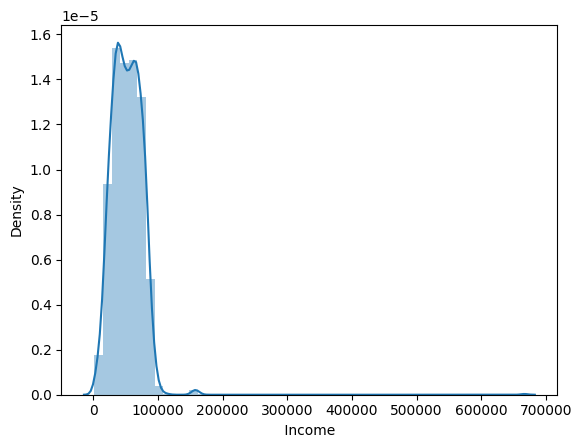

In [89]:
sns.distplot(df[" Income "])

In [90]:
df['Income']=df.groupby(['Education','Marital_Status'])[' Income '].transform(lambda x: x.fillna(x.median()))
df['Income'].isnull().sum()

np.int64(0)

•	Create variables to populate the total number of children, age, and total spending.

In [91]:
df['Children']=df['Kidhome']+df['Teenhome']
ref_year = df['Dt_Customer'].dt.year
df['Age'] = ref_year - df['Year_Birth']
df['Total_Spend']=np.sum(df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df['Total_purcheases']=np.sum(df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']],axis=1)
df[['Age', 'Children', 'Total_Spend', 'Total_purcheases']].head()

,Age,Children,Total_Spend,Total_purcheases
0,44,0,1190,16
1,53,0,577,23
2,56,1,251,13
3,47,2,11,11
4,25,1,91,15


In [92]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Children,Age,Total_Spend,Total_purcheases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,0,44,1190,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,0,53,577,23
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,1,56,251,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,2,47,11,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,1,25,91,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0,1,37,689,24
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0,1,36,55,13
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0,1,36,309,22
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0,0,34,1383,23


•	Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

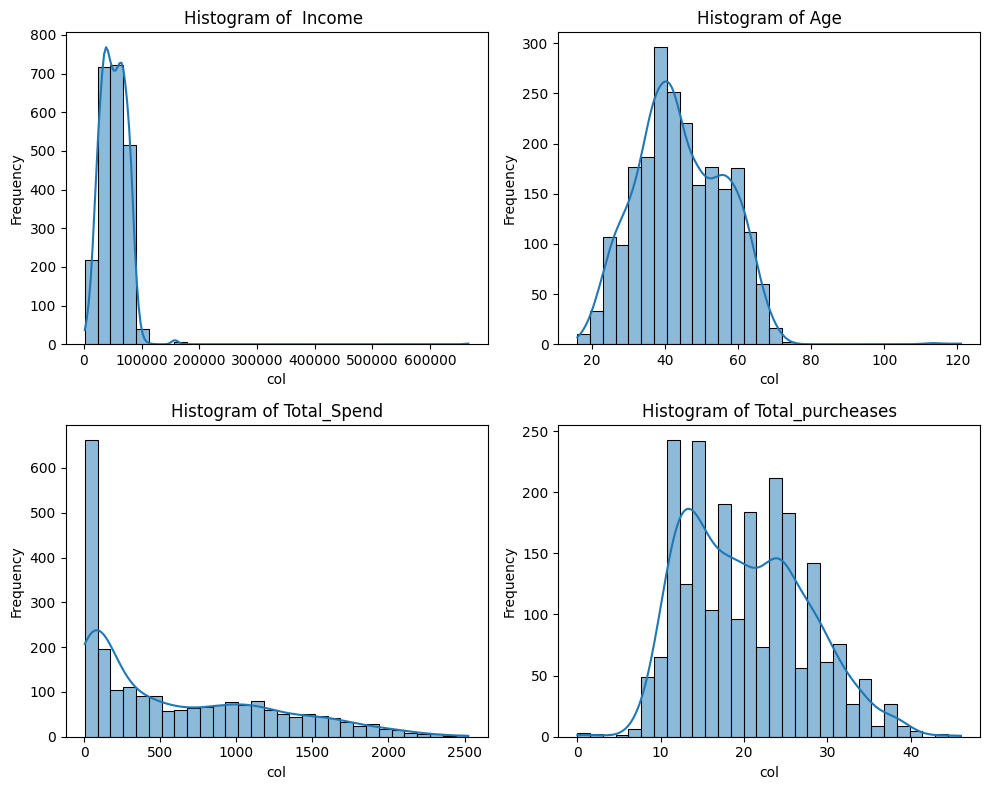

In [93]:
numeric_cols=[' Income ','Age','Total_Spend','Total_purcheases']

plt.figure(figsize=(10,8))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,2,i)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(f'Histogram of {col}')
  plt.xlabel('col')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


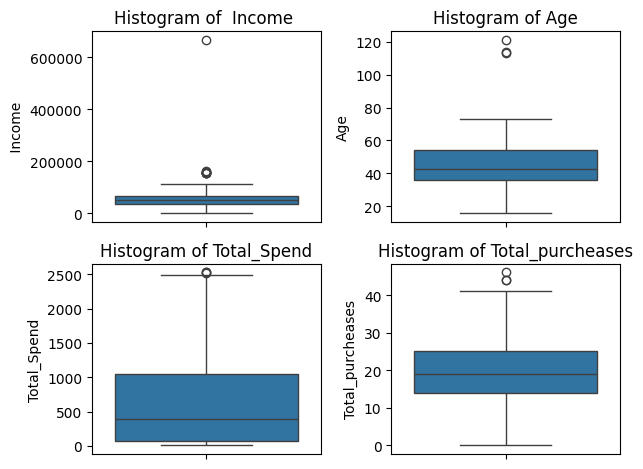

In [94]:
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,2,i)
  sns.boxplot(df[col],vert=True)
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [95]:
df['Age'] = winsorize(df['Age'], limits=[0.05, 0.05])

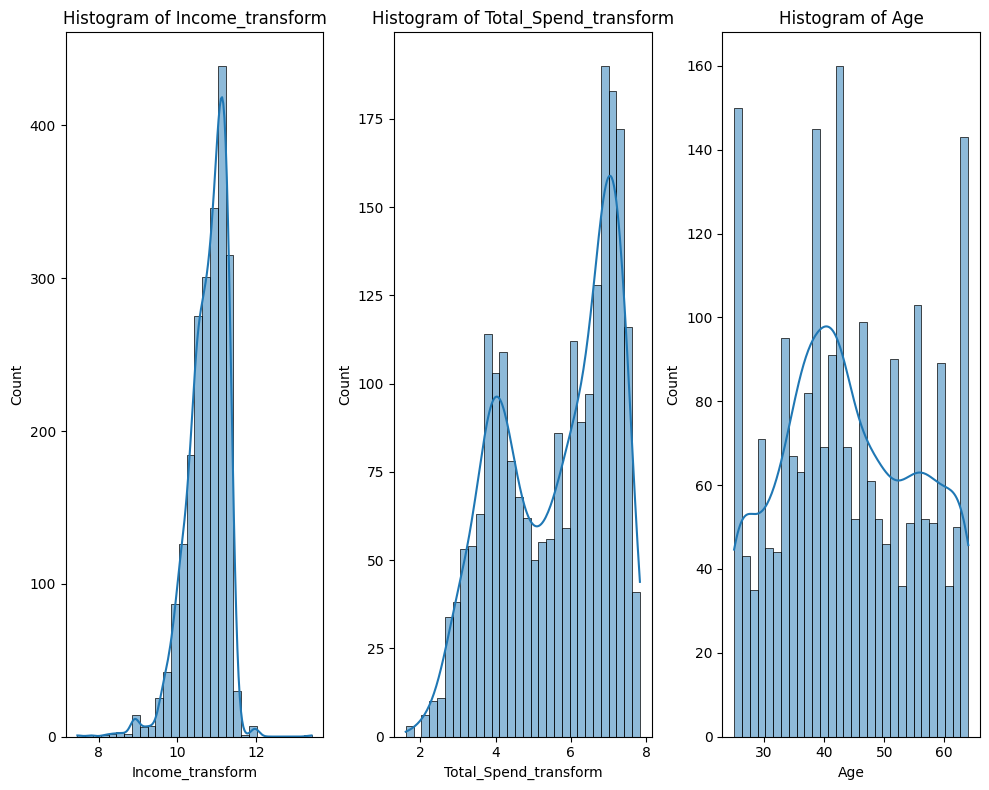

In [96]:
# log transform
df['Income_transform']=np.log(df[' Income '])
df['Total_Spend_transform']=np.log(df['Total_Spend'])
num_col=['Income_transform','Total_Spend_transform','Age']
plt.figure(figsize=(10,8))
for i,col in enumerate(num_col,1):
  plt.subplot(1,3,i)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()



•	Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [97]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [98]:
# Ordinal Encoding
encoder=OrdinalEncoder()
df['Education_clean']=encoder.fit_transform(df[['Education']])
# OneHot Encoding
encoder=OneHotEncoder(sparse_output=False)
encoder.fit_transform(df[['Marital_Status','Country']])


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

•	Create a heatmap to showcase the correlation between different pairs of variables.

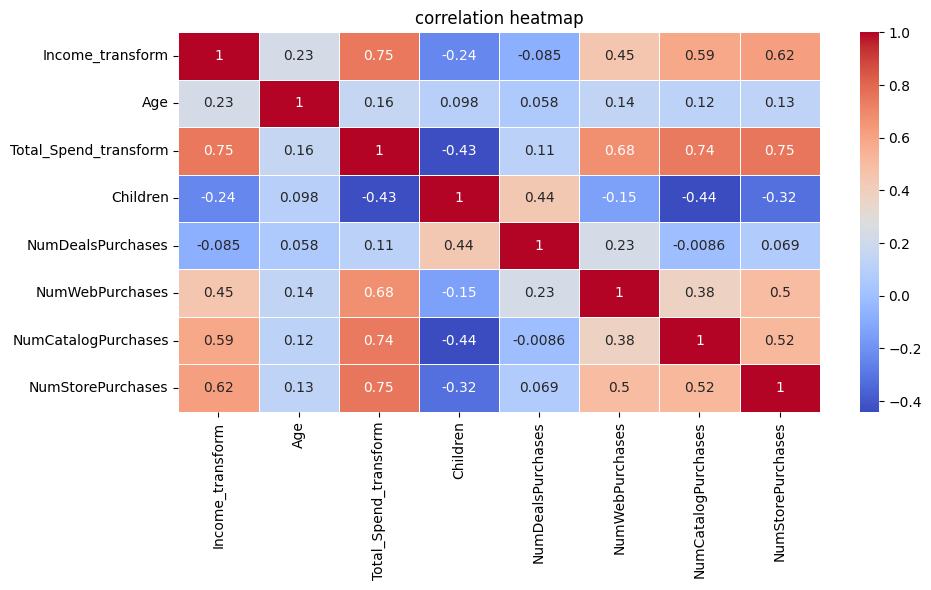

In [99]:
corr_cols=['Income_transform','Age','Total_Spend_transform','Children','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

corr=df[corr_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("correlation heatmap")
plt.tight_layout()
plt.show()

•	Test the following hypotheses:







1.Older people are not as tech-savvy and probably prefer shopping in-store.

In [100]:
df['store_share']=df['NumStorePurchases']/df['Total_purcheases'].replace(0,np.nan)
df['web_share']=df['NumWebPurchases']/df['Total_purcheases'].replace(0,np.nan)

In [101]:
df['Age_Category']=df['Age'].apply(lambda x:'younger' if x<50 else 'older')
df['Age_Category']

,Age_Category
0,younger
1,older
2,older
3,younger
4,younger
...,...
2235,younger
2236,younger
2237,younger
2238,younger


In [102]:
younger_age = df[df['Age_Category'] == 'younger']['store_share'].dropna()
older_age   = df[df['Age_Category'] == 'older']['store_share'].dropna()

In [103]:
# T test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(older_age, younger_age, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)



t-statistic: 5.690777923703688
p-value: 1.5227040390327632e-08


In [104]:
# p-value =8.340143275420771e-10 <0.05
# Reject H0,There is a statistically significant difference in store purchases  between age groups. Older customers make more in-store purchases than younger customers, indicating a stronger preference for shopping in physical stores.

In [105]:
df.groupby('Age_Category')['store_share'].mean()

,store_share
Age_Category,
older,0.299065
younger,0.272559


2. Customers with kids probably have less time to visit a store and would prefer to shop online.

In [106]:
df['Children_catagory']=df['Children'].apply(lambda x:'No children' if x==0 else 'Children')
df['Children_catagory']


,Children_catagory
0,No children
1,No children
2,Children
3,Children
4,Children
...,...
2235,Children
2236,Children
2237,Children
2238,No children


In [107]:
without_children=df[df['Children_catagory']=='No children']['web_share'].dropna()
with_children=df[df['Children_catagory']=='Children']['web_share'].dropna()

In [108]:
# t test
t_test,p_value=ttest_ind(without_children,with_children,equal_var=False)
print("t_statistic:",t_test)
print("p_value:",p_value)

t_statistic: 5.18091154356739
p_value: 2.595352736971066e-07


In [109]:
# p-value =2.595352736971066e-07 <0.05
# Reject H0,it is satisfically significant that customers with chidren prefer more online shopping than in store purchases than customer without children.

Other distribution channels may cannibalize sales at the store.

In [110]:
web_store_corr=df['NumStorePurchases'].corr(df['NumWebPurchases'])
catalog_store_corr=df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(web_store_corr)
print(catalog_store_corr)

0.5027134132997315
0.5187382827187551


In [111]:
# it is positively correlated so we can conclude that customer who buy from web or catalog also buy from store.

Does the US fare significantly better than the rest of the world in terms of total purchases?

In [112]:
df['Country_category']=df['Country'].apply(lambda x:'USA' if x=='US'else 'other')

In [113]:
usa=df[df['Country_category']=='USA']['Total_purcheases']
non_usa=df[df['Country_category']=='other']['Total_purcheases']



In [114]:
# t-test
t_test,p_value=ttest_ind(usa,non_usa,equal_var=False)
print("t_statistic:",t_test)
print("p_value:",p_value)

t_statistic: 2.217295628408423
p_value: 0.028513777131229073


In [115]:
# p_value=0.028513777131229073<0.05
# reject H0,It is satisfically significant that US fare is better than the rest of the world fare

•	Use appropriate visualization to help analyze the following:





Which products are performing the best, and which are performing the least in terms of revenue?

In [116]:
spend_cols=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
Prod_revenue=df[spend_cols].sum().sort_values(ascending=False)
Prod_revenue

,0
MntWines,680816
MntMeatProducts,373968
MntGoldProds,98609
MntFishProducts,84057
MntSweetProducts,60621
MntFruits,58917


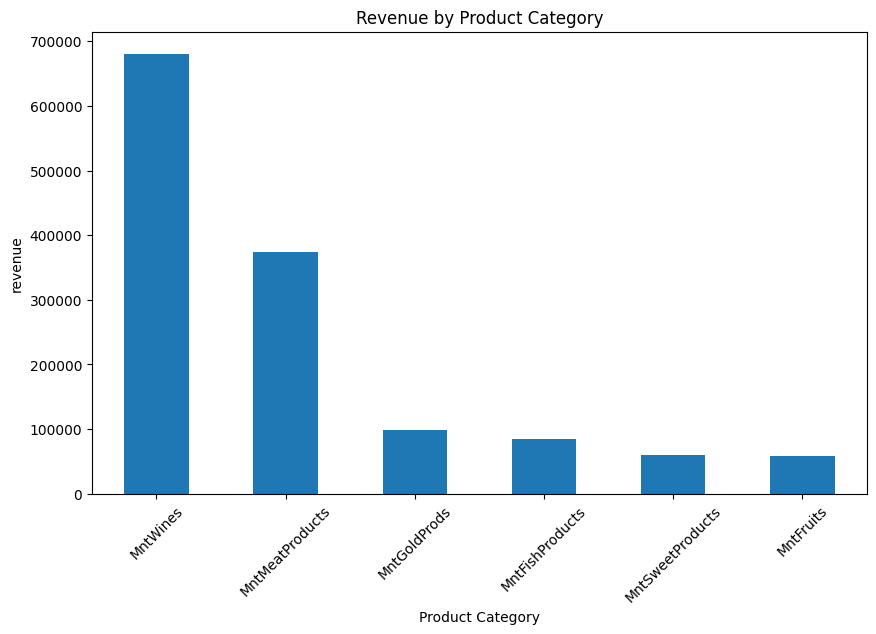

In [117]:
Prod_revenue.plot(kind='bar',figsize=(10,6))
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('revenue')
plt.xticks(rotation=45)
plt.show()

	Is there any pattern between the age of customers and the last campaign acceptance rate?

In [118]:
df['Age_bin']=pd.cut(df['Age'],bins=range(20,90,10))

In [119]:
accept_rate=df.groupby('Age_bin')['Response'].mean()
print(accept_rate)

Age_bin
(20, 30]    0.210702
(30, 40]    0.136066
(40, 50]    0.139683
(50, 60]    0.139831
(60, 70]    0.148472
(70, 80]         NaN
Name: Response, dtype: float64


/tmp/ipython-input-4126066339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accept_rate=df.groupby('Age_bin')['Response'].mean()


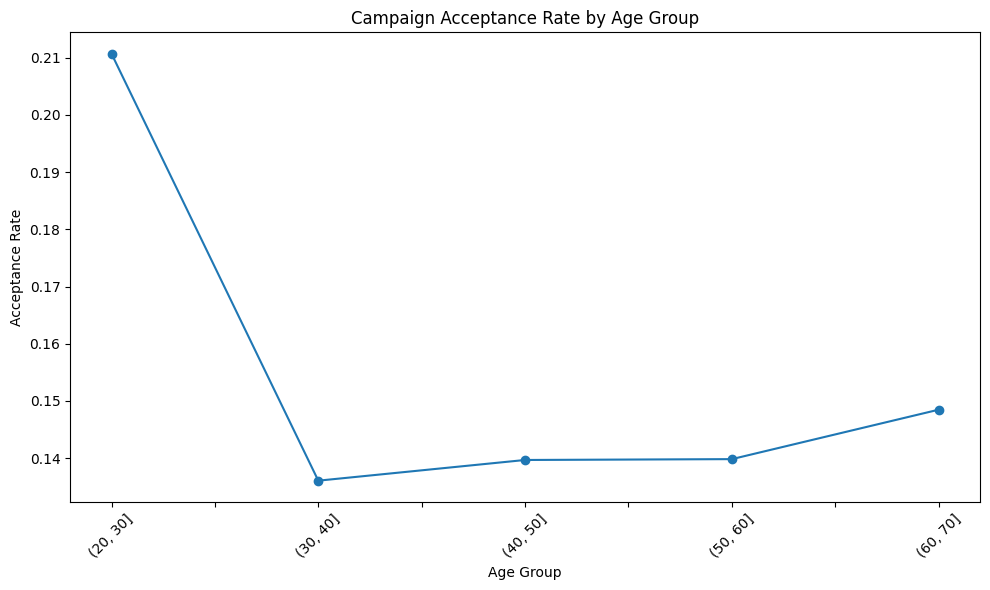

In [120]:
accept_rate.plot(kind='line',marker='o',figsize=(10,6))
plt.title("Campaign Acceptance Rate by Age Group")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which Country has the greatest number of customers who accepted the last campaign?

In [121]:
accept_by_country=(df[df['Response']==1].groupby('Country')['Response'].count().sort_values(ascending=False))
accept_by_country

,Response
Country,
SP,176
SA,52
CA,38
AUS,23
GER,17
IND,13
US,13
ME,2


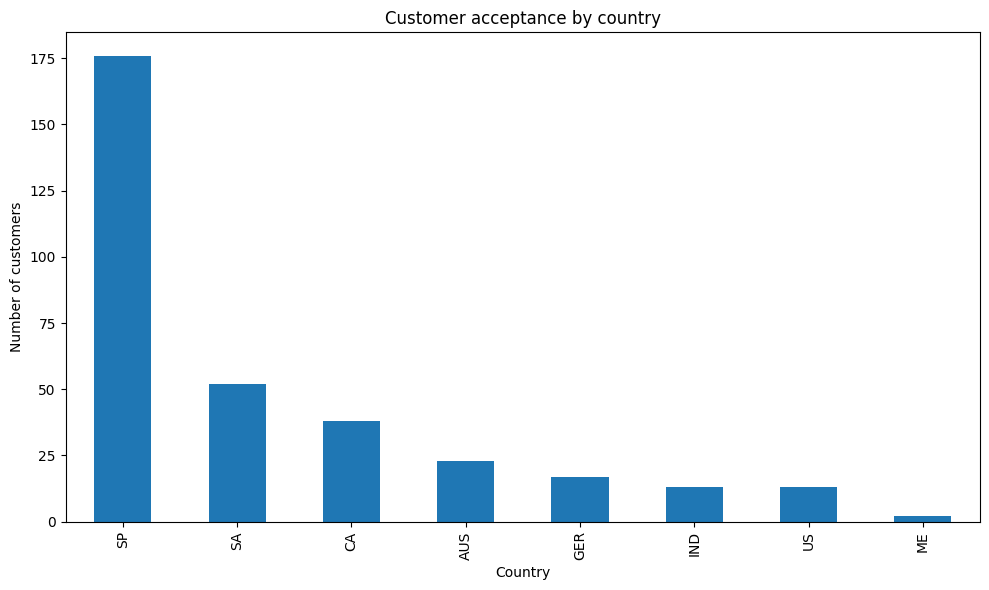

In [122]:
accept_by_country.plot(kind='bar',figsize=(10,6))
plt.title("Customer acceptance by country")
plt.ylabel("Number of customers")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

	Do you see any pattern in the no. of children at home and total spend?

In [123]:
spend_by_children=df.groupby('Children')['Total_Spend'].mean().sort_values(ascending=False)
spend_by_children

,Total_Spend
Children,
0,1106.029781
1,472.733156
3,274.603774
2,245.947743


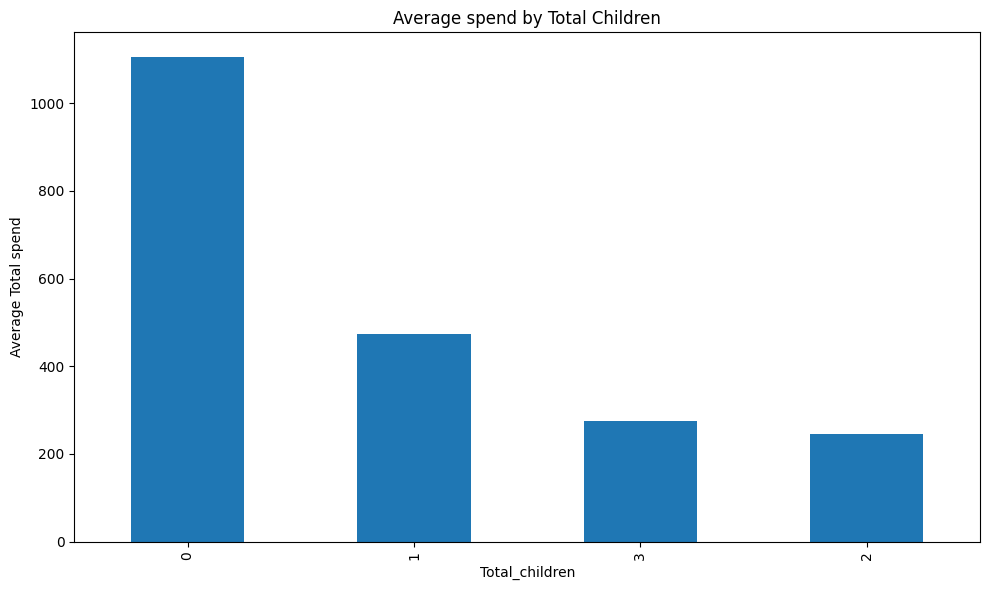

In [124]:
spend_by_children.plot(kind='bar',figsize=(10,6))
plt.title("Average spend by Total Children")
plt.xlabel("Total_children")
plt.ylabel("Average Total spend")
plt.tight_layout()
plt.show()


Education background of the customers who complained in the last 2 years.

In [133]:
latest_cust_date=df['Dt_Customer'].max()
two_years= latest_cust_date - pd.DateOffset(years=2)

In [134]:
complainers_last_2yrs = df[(df["Dt_Customer"] >= two_years_ago) & (df["Complain"] == 1)]

In [135]:
education_counts = complainers_last_2yrs["Education"].value_counts()

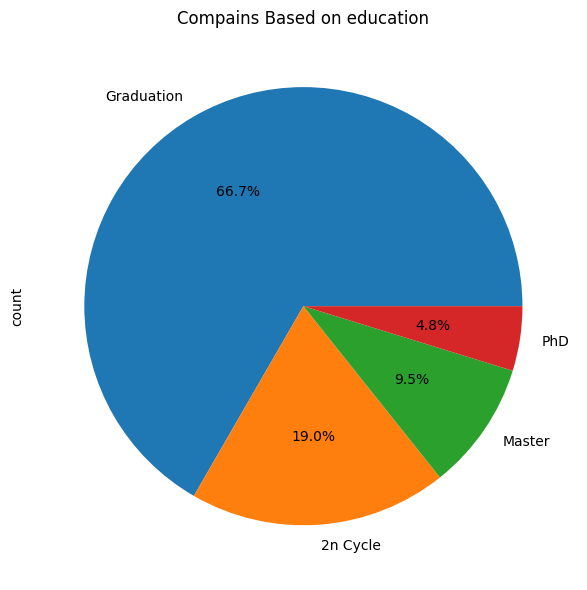

In [136]:
education_counts.plot(kind='pie',autopct='%.1f%%',figsize=(10,6))
plt.title("Compains Based on education")
plt.tight_layout()
plt.show()